
Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---



# Define ML problems
- Choose a target to predict, and check its distribution
- Avoid leakage of information from test to train or from target to features
- Choose an appropriate evaluation metric


### Setup


In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Choose a target to predict, and check its distribution

## Overview

This is the data science process at a high level:

<img src="https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295">

—Renee Teate, [Becoming a Data Scientist, PyData DC 2016 Talk](https://www.becomingadatascientist.com/2016/10/11/pydata-dc-2016-talk/)

We've focused on the 2nd arrow in the diagram, by training predictive models. Now let's zoom out and focus on the 1st arrow: defining problems, by translating business questions into code/data questions.

Last sprint, you did a Kaggle Challenge. It’s a great way to practice model validation and other technical skills. But that's just part of the modeling process. [Kaggle gets critiqued](https://speakerdeck.com/szilard/machine-learning-software-in-practice-quo-vadis-invited-talk-kdd-conference-applied-data-science-track-august-2017-halifax-canada?slide=119) because some things are done for you: Like [**defining the problem!**](https://www.linkedin.com/pulse/data-science-taught-universities-here-why-maciej-wasiak/) In today’s module, you’ll begin to practice this objective, with your dataset you’ve chosen for your personal portfolio project.

When defining a supervised machine learning problem, one of the first steps is choosing a target to predict.

Which column in your tabular dataset will you predict?

Is your problem regression or classification? You have options. Sometimes it’s not straightforward, as we'll see below.

- Discrete, ordinal, low cardinality target: Can be regression or multi-class classification.
- (In)equality comparison: Converts regression or multi-class classification to binary classification.
- Predicted probability: Seems to [blur](https://brohrer.github.io/five_questions_data_science_answers.html) the line between classification and regression.

## Follow Along

Let's reuse the [Burrito reviews dataset.](https://nbviewer.jupyter.org/github/LambdaSchool/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/LS_DS_214_assignment.ipynb) 🌯


In [ ]:
import pandas as pd
pd.options.display.max_columns = None
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv', dtype={'Yelp':'object'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        423 non-null    object 
 1   Burrito         423 non-null    object 
 2   Date            423 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     object 
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            416 non-null    float64
 10  Hunger          420 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          284 non-null    float64
 14  Circum          282 non-null    float64
 15  Volume          282 non-null    float64
 16  Tortilla        423 non-null    float64
 17  Temp            403 non-null    flo

In [ ]:
df.select_dtypes('object').columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Chips', 'Rec', 'Reviewer', 'Notes', 'Unreliable', 'NonSD', 'Beef',
       'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken',
       'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper',
       'Carrots', 'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion',
       'Taquito', 'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster',
       'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini'],
      dtype='object')

In [ ]:
str_cols = [col for col in df.select_dtypes('object').columns
            if df[col].isnull().sum() < 100]

print(str_cols)

['Location', 'Burrito', 'Date', 'Reviewer']


In [ ]:
df['overall'].describe()

count    421.000000
mean       3.620887
std        0.755718
min        1.000000
25%        3.100000
50%        3.800000
75%        4.100000
max        5.000000
Name: overall, dtype: float64

In [ ]:
num_cols = [col for col in df.select_dtypes('number').columns 
            if df[col].isnull().sum() < 50]

num_cols.pop();

In [ ]:
cols = num_cols + ['Burrito', 'Date']

In [ ]:
df = df[cols]

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: overall, dtype: int64

In [ ]:
df.head()

,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Burrito,Date,california,asada,carnitas,surf
0,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,california,1/18/2016,1,0,0,0
1,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,california,1/24/2016,1,0,0,0
2,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,carnitas,1/24/2016,0,0,1,0
3,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,carne asada,1/24/2016,0,1,0,0
4,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,california,1/27/2016,1,0,0,0


In [ ]:
df.Burrito = df.Burrito.str.lower().str.strip()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
burrito_types = ['california', 'asada', 'carnitas', 'surf']

for b in burrito_types:
  df[b] = df.Burrito.str.contains(b).astype(int)

In [ ]:
df.drop('Burrito', axis=1, inplace=True)

In [ ]:
df.head()

,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Date,california,asada,carnitas,surf
0,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,1/18/2016,1,0,0,0
1,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,1/24/2016,1,0,0,0
2,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,1/24/2016,0,0,1,0
3,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,1/24/2016,0,1,0,0
4,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,1/27/2016,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cost          416 non-null    float64
 1   Hunger        420 non-null    float64
 2   Tortilla      423 non-null    float64
 3   Temp          403 non-null    float64
 4   Meat          409 non-null    float64
 5   Fillings      420 non-null    float64
 6   Meat:filling  414 non-null    float64
 7   Uniformity    421 non-null    float64
 8   Salsa         398 non-null    float64
 9   Synergy       421 non-null    float64
 10  Wrap          420 non-null    float64
 11  Date          423 non-null    object 
 12  california    423 non-null    int64  
 13  asada         423 non-null    int64  
 14  carnitas      423 non-null    int64  
 15  surf          423 non-null    int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 53.0+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 422
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cost          358 non-null    float64
 1   Hunger        358 non-null    float64
 2   Tortilla      358 non-null    float64
 3   Temp          358 non-null    float64
 4   Meat          358 non-null    float64
 5   Fillings      358 non-null    float64
 6   Meat:filling  358 non-null    float64
 7   Uniformity    358 non-null    float64
 8   Salsa         358 non-null    float64
 9   Synergy       358 non-null    float64
 10  Wrap          358 non-null    float64
 11  Date          358 non-null    object 
 12  california    358 non-null    int64  
 13  asada         358 non-null    int64  
 14  carnitas      358 non-null    int64  
 15  surf          358 non-null    int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 47.5+ KB


In [ ]:
df.head(20)

,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Date,california,asada,carnitas,surf
0,6.49,3.0,3.0,5.0,3.00,3.5,4.0,4.0,4.0,4.0,4.0,1/18/2016,1,0,0,0
1,5.45,3.5,2.0,3.5,2.50,2.5,2.0,4.0,3.5,2.5,5.0,1/24/2016,1,0,0,0
2,4.85,1.5,3.0,2.0,2.50,3.0,4.5,4.0,3.0,3.0,5.0,1/24/2016,0,0,1,0
3,5.25,2.0,3.0,2.0,3.50,3.0,4.0,5.0,4.0,4.0,5.0,1/24/2016,0,1,0,0
4,6.59,4.0,4.0,5.0,4.00,3.5,4.5,5.0,2.5,4.5,4.0,1/27/2016,1,0,0,0
5,6.99,4.0,3.0,4.0,5.00,3.5,2.5,2.5,2.5,4.0,1.0,1/28/2016,0,0,0,0
8,9.25,3.5,2.0,4.5,4.50,3.5,1.5,3.0,3.5,4.0,2.0,2/1/2016,1,0,0,0
9,6.25,3.5,2.5,1.5,1.50,3.0,4.5,3.0,1.5,2.0,4.5,2/6/2016,0,1,0,0
10,9.50,2.0,2.5,2.5,2.75,2.5,2.5,2.0,0.5,3.0,3.5,2/6/2016,0,0,0,1
11,6.95,2.0,3.0,4.0,4.00,3.0,4.0,4.0,1.0,2.0,1.0,2/11/2016,0,0,0,0


In [ ]:
df.shape

(358, 16)

In [ ]:
y = y[df.index]

### Choose your target 

Which column in your tabular dataset will you predict?


In [ ]:
y = (df['overall'] >= 4).astype(int)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: overall, dtype: int64

### How is your target distributed?

For a classification problem, determine: How many classes? Are the classes imbalanced?

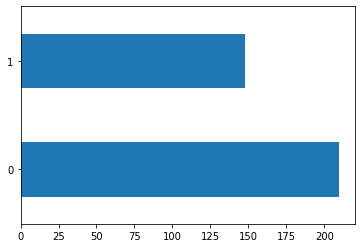

In [ ]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind='barh')

In [ ]:
df['Location'].nunique()

108

In [ ]:
df.groupby('Reviewer')['overall'].mean()

Reviewer
@danjlurie      4.70
@synapticlee    4.00
AC              4.00
Aaron K         4.25
Aaron S         4.00
                ... 
Tammy           2.00
Tara            4.25
Tom             3.50
Torben          3.00
Xi              3.50
Name: overall, Length: 106, dtype: float64

# Avoid leakage of information from test to train or from target to features

## Overview

Overfitting is our enemy in applied machine learning, and leakage is often the cause.

> Make sure your training features do not contain data from the “future” (aka time traveling). While this might be easy and obvious in some cases, it can get tricky. … If your test metric becomes really good all of the sudden, ask yourself what you might be doing wrong. Chances are you are time travelling or overfitting in some way. — [Xavier Amatriain](https://www.quora.com/What-are-some-best-practices-for-training-machine-learning-models/answer/Xavier-Amatriain)

Choose train, validate, and test sets. Are some observations outliers? Will you exclude them? Will you do a random split or a time-based split? You can (re)read [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/).

## Follow Along

First, begin to **explore and clean your data.**

In [ ]:
df.head()

,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Date,california,asada,carnitas,surf
Date,,,,,,,,,,,,,,,,
2016-01-18,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,1/18/2016,1,0,0,0
2016-01-24,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,1/24/2016,1,0,0,0
2016-01-24,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,1/24/2016,0,0,1,0
2016-01-24,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,1/24/2016,0,1,0,0
2016-01-27,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,1/27/2016,1,0,0,0


Next, do a **time-based split:**

- Train on reviews from 2016 & earlier. 
- Validate on 2017. 
- Test on 2018 & later.

In [ ]:
df.index = pd.to_datetime(df.Date)
df.drop('Date', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

Begin to choose which features, if any, to exclude. **Would some features “leak” future information?**

What happens if we _DON’T_ drop features with leakage?

In [ ]:
y.value_counts()

0    210
1    148
Name: overall, dtype: int64

Drop the column with “leakage”.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(286, 15)
(286,)
(72, 15)
(72,)


In [ ]:
print('train accuracy', log_model.score(X_train, y_train))
print('test accuracy', log_model.score(X_test, y_test))

train accuracy 0.9055944055944056
test accuracy 0.8194444444444444


In [ ]:
print('train accuracy', rfc_model.score(X_train, y_train))
print('test accuracy', rfc_model.score(X_test, y_test))

train accuracy 1.0
test accuracy 0.7777777777777778


# Choose an appropriate evaluation metric

## Overview

How will you evaluate success for your predictive model? You must choose an appropriate evaluation metric, depending on the context and constraints of your problem.

**Classification & regression metrics are different!**

- Don’t use _regression_ metrics to evaluate _classification_ tasks.
- Don’t use _classification_ metrics to evaluate _regression_ tasks.

[Scikit-learn has lists of popular metrics.](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

## Follow Along

For classification problems: 

As a rough rule of thumb, if your majority class frequency is >= 50% and < 70% then you can just use accuracy if you want. Outside that range, accuracy could be misleading — so what evaluation metric will you choose, in addition to or instead of accuracy? For example:

- Precision?
- Recall?
- ROC AUC?


### Precision & Recall

Let's review Precision & Recall. What do these metrics mean, in scenarios like these?

- Predict great burritos
- Predict fraudulent transactions
- Recommend Spotify songs

[Are false positives or false negatives more costly? Can you optimize for dollars?](https://alexgude.com/blog/machine-learning-metrics-interview/)

### ROC AUC 

Let's also review ROC AUC (Receiver Operating Characteristic, Area Under the Curve).

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. **The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.**"

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures **how well a classifier ranks predicted probabilities.** So, when you get your classifier’s ROC AUC score, you need to **use predicted probabilities, not discrete predictions.**

ROC AUC ranges **from 0 to 1.** Higher is better. A naive majority class **baseline** will have an ROC AUC score of **0.5**, regardless of class (im)balance.

#### Scikit-Learn docs
- [User Guide: Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

#### More links
- [StatQuest video](https://youtu.be/4jRBRDbJemM)
- [Data School article / video](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Imbalanced classes

Do you have highly imbalanced classes?

If so, you can try ideas from [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/):

- “Adjust the class weight (misclassification costs)” — most scikit-learn classifiers have a `class_balance` parameter.
- “Adjust the decision threshold” — we did this last module. Read [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).
- “Oversample the minority class, undersample the majority class, or synthesize new minority classes” — try the the [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library as a stretch goal.

# BONUS: Regression example 🏘️


In [ ]:
# Read our NYC apartment rental listing dataset
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')

### Choose your target

Which column in your tabular dataset will you predict?


In [ ]:
y = df['price']

### How is your target distributed?

For a regression problem, determine: Is the target right-skewed?


In [ ]:
# Yes, the target is right-skewed
import seaborn as sns
sns.distplot(y);

In [ ]:
y.describe()

### Are some observations outliers? 

Will you exclude
them?


In [ ]:
# Yes! There are outliers
# Some prices are so high or low it doesn't really make sense.
# Some locations aren't even in New York City

# Remove the most extreme 1% prices, 
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
import numpy as np
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [ ]:
# The distribution has improved, but is still right-skewed
y = df['price']
sns.distplot(y);

In [ ]:
y.describe()

### Log-Transform

If the target is right-skewed, you may want to “log transform” the target.


> Transforming the target variable (using the mathematical log function) into a tighter, more uniform space makes life easier for any [regression] model.
>
> The only problem is that, while easy to execute, understanding why taking the log of the target variable works and how it affects the training/testing process is intellectually challenging. You can skip this section for now, if you like, but just remember that this technique exists and check back here if needed in the future.
>
> Optimally, the distribution of prices would be a narrow “bell curve” distribution without a tail. This would make predictions based upon average prices more accurate. We need a mathematical operation that transforms the widely-distributed target prices into a new space. The “price in dollars space” has a long right tail because of outliers and we want to squeeze that space into a new space that is normally distributed. More specifically, we need to shrink large values a lot and smaller values a little. That magic operation is called the logarithm or log for short. 
>
> To make actual predictions, we have to take the exp of model predictions to get prices in dollars instead of log dollars. 
>
>— Terence Parr & Jeremy Howard, [The Mechanics of Machine Learning, Chapter 5.5](https://mlbook.explained.ai/prep.html#logtarget)

[Numpy has exponents and logarithms](https://docs.scipy.org/doc/numpy/reference/routines.math.html#exponents-and-logarithms). Your Python code could look like this:

```python
import numpy as np
y_train_log = np.log1p(y_train)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
print(mean_absolute_error(y_val, y_pred))
```

In [ ]:
sns.distplot(y)
plt.title('Original target, in the unit of US dollars');

In [ ]:
y_log = np.log1p(y)
sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

In [ ]:
y_untransformed = np.expm1(y_log)
sns.distplot(y_untransformed)
plt.title('Back to the original units');

## Challenge

You will use your portfolio project dataset for all assignments this sprint. (If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.)

Complete these tasks for your project, and document your decisions.

- Choose your target. Which column in your tabular dataset will you predict?
- Is your problem regression or classification?
- How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- Begin to clean and explore your data.
- Begin to choose which features, if any, to exclude. Would some features "leak" future information?

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)